In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
Housing_Path = "/Users/jayantgurusrivastava/Documents/Machine_Learning/Kaggle/house-prices-advanced-regression-techniques"

def load_housing_data(housing_path = Housing_Path):
    csv_path = os.path.join(housing_path, "train.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [7]:
housing_exp = train_set.copy()
housing_exp_num = housing_exp.select_dtypes(['number'])

In [8]:
corr_matrix = housing_exp_num.corr()

In [9]:
corr_matrix["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.785555
GrLivArea        0.695652
GarageCars       0.640991
GarageArea       0.624139
TotalBsmtSF      0.597766
1stFlrSF         0.587883
FullBath         0.552546
TotRmsAbvGrd     0.520388
YearBuilt        0.516501
YearRemodAdd     0.508593
GarageYrBlt      0.480351
MasVnrArea       0.459123
Fireplaces       0.457549
BsmtFinSF1       0.359460
LotFrontage      0.330066
WoodDeckSF       0.329843
2ndFlrSF         0.314030
OpenPorchSF      0.299969
HalfBath         0.280481
LotArea          0.266204
BsmtFullBath     0.226346
BsmtUnfSF        0.222487
BedroomAbvGr     0.156211
ScreenPorch      0.119172
PoolArea         0.115630
3SsnPorch        0.051532
MoSold           0.041890
BsmtFinSF2      -0.005731
YrSold          -0.009099
LowQualFinSF    -0.011189
Id              -0.019643
MiscVal         -0.020179
BsmtHalfBath    -0.048346
OverallCond     -0.074391
MSSubClass      -0.088081
KitchenAbvGr    -0.142785
EnclosedPorch   -0.149532
Name: SalePr

array([[<Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>],
       [<Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageCars', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GrLivArea'>,
        <Axes: xlabel='1stFlrSF', ylabel='GrLivArea'>],
       [<Axes: xlabel='OverallQual', ylabel='GarageCars'>,
        <Axes: xlabel='GrLivArea', ylabel='GarageCars'>,
        <Axes: xlabel='GarageCars', ylabel='GarageCars'>,
        <Axes: xlabel='GarageArea', ylabel='GarageCars'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GarageCars'>,
        <Axes

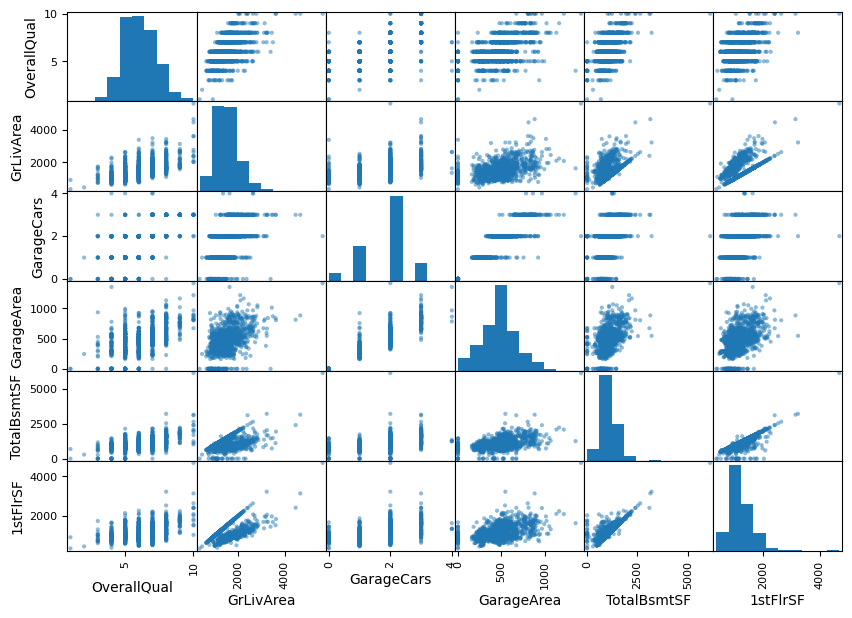

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF"]

scatter_matrix(housing_exp_num[attributes], figsize = (10, 7))

<Axes: >

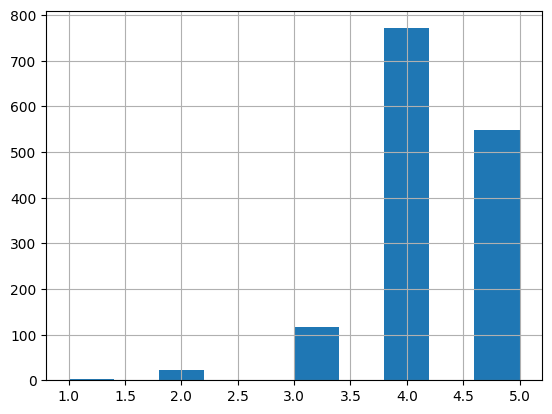

In [11]:
# Now let's do stratified sampling based on the highest correlation factor i.e. OverallQual
housing["OverallQual_cat"] = pd.cut(housing["OverallQual"], bins = [0, 1.5, 3, 4.5, 6, np.inf], labels = [1, 2, 3, 4, 5])
housing["OverallQual_cat"].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["OverallQual_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
# Now let's remove "OverallQual_cat" from test and train set
strat_test_set.drop("OverallQual_cat", axis = 1, inplace = True)
strat_train_set.drop("OverallQual_cat", axis = 1, inplace = True)

In [14]:
housing = strat_train_set.drop("SalePrice", axis = 1)
housing_labels = strat_train_set["SalePrice"].copy()

In [15]:
housing_num = housing.select_dtypes(['number'])
housing_cat = housing.select_dtypes(exclude = ['number'])

In [16]:
housing_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1422,1423,120,37.0,4435,6,5,2003,2003,170.0,686,...,420,140,0,0,0,0,0,0,3,2008
874,875,50,52.0,5720,5,6,1941,1950,0.0,0,...,200,26,0,0,0,0,0,0,8,2009
754,755,20,61.0,7930,6,8,1969,2005,0.0,439,...,440,171,48,0,0,0,0,0,7,2009
444,445,60,70.0,8750,7,5,1994,1995,0.0,642,...,493,144,133,0,0,0,0,0,7,2008
411,412,190,100.0,34650,5,5,1955,1955,0.0,1056,...,572,264,0,0,0,0,0,0,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,669,20,NaN,14175,5,6,1956,1987,0.0,988,...,576,304,0,0,0,0,0,0,11,2006
1033,1034,20,NaN,8125,7,5,2002,2002,295.0,986,...,900,0,136,0,0,0,0,0,2,2006
896,897,30,50.0,8765,4,6,1936,1950,0.0,285,...,327,0,28,0,0,0,0,0,4,2006
1281,1282,20,50.0,8049,7,5,1990,1990,54.0,1053,...,484,0,58,0,0,90,0,0,7,2006


In [17]:
housing_Id = housing["Id"]
housing_num = housing_num.drop("Id", axis = 1)

In [18]:
housing_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1422,120,37.0,4435,6,5,2003,2003,170.0,686,0,...,420,140,0,0,0,0,0,0,3,2008
874,50,52.0,5720,5,6,1941,1950,0.0,0,0,...,200,26,0,0,0,0,0,0,8,2009
754,20,61.0,7930,6,8,1969,2005,0.0,439,472,...,440,171,48,0,0,0,0,0,7,2009
444,60,70.0,8750,7,5,1994,1995,0.0,642,0,...,493,144,133,0,0,0,0,0,7,2008
411,190,100.0,34650,5,5,1955,1955,0.0,1056,0,...,572,264,0,0,0,0,0,0,1,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,20,NaN,14175,5,6,1956,1987,0.0,988,0,...,576,304,0,0,0,0,0,0,11,2006
1033,20,NaN,8125,7,5,2002,2002,295.0,986,0,...,900,0,136,0,0,0,0,0,2,2006
896,30,50.0,8765,4,6,1936,1950,0.0,285,0,...,327,0,28,0,0,0,0,0,4,2006
1281,20,50.0,8049,7,5,1990,1990,54.0,1053,0,...,484,0,58,0,0,90,0,0,7,2006


In [19]:
housing_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1422,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
874,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
754,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Detchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
444,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
411,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,RL,Pave,NaN,Reg,Bnk,AllPub,Corner,Mod,Sawyer,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1033,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
896,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1281,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Timber,Norm,...,Attchd,Fin,Gd,Gd,Y,NaN,NaN,NaN,WD,Normal


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])

In [22]:
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = "most_frequent")),
    ('one_hot_encode', OneHotEncoder(handle_unknown = 'ignore')),
])

In [23]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, list(housing_num)),
    ("cat", cat_pipeline, list(housing_cat)),
] ,remainder = "drop")

In [24]:
housing_prepared = full_pipeline.fit_transform(housing)

In [25]:
housing_prepared

<1168x282 sparse matrix of type '<class 'numpy.float64'>'
	with 92272 stored elements in Compressed Sparse Row format>

In [26]:
# pd.DataFrame.sparse.from_spmatrix(housing_prepared)  # Just for visualization

In [27]:
from sklearn.linear_model import LinearRegression

model1_lin_reg = LinearRegression()
model1_lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [28]:
import joblib

joblib.dump(model1_lin_reg, "model1_lin_reg.pkl")

['model1_lin_reg.pkl']

In [29]:
some_data = housing.iloc[:5]

In [30]:
some_labels = housing_labels.iloc[:5]

In [31]:
some_data_prepared = full_pipeline.transform(some_data)

In [32]:
print("Predictions: ", model1_lin_reg.predict(some_data_prepared))

Predictions:  [136552.45785567  81179.69909812 151037.10240332 213464.99252521
 139044.56053448]


In [33]:
print("Labels: ", list(some_labels))

Labels:  [136500, 66500, 156000, 210000, 145000]


In [34]:
from sklearn.metrics import mean_squared_error
housing_predictions = model1_lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

18876.96062714272

In [35]:
# Let's make a function to calculate rmse scores

def rmse(housing_labels, housing_predictions):
    mse = mean_squared_error(housing_labels, housing_predictions)
    rmse = np.sqrt(mse)
    return rmse

In [36]:
housing_labels.mean()

179268.8904109589

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1_lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_reg_scores = np.sqrt(-scores)
lin_reg_scores

array([28084.01117065, 26468.68839098, 25033.90903409, 56054.31802024,
       23093.45682152, 20088.2597159 , 19377.49001664, 79069.54951166,
       29424.84465181, 47108.32616208])

In [38]:
from sklearn.tree import DecisionTreeRegressor

model2_tree_reg = DecisionTreeRegressor()
model2_tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [39]:
joblib.dump(model2_tree_reg, "model2_tree_reg.pkl")

['model2_tree_reg.pkl']

In [40]:
housing_predictions = model2_tree_reg.predict(housing_prepared)

In [41]:
rmse(housing_labels, housing_predictions)  # Overfitting

0.0

In [42]:
scores = cross_val_score(model2_tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_reg_scores = np.sqrt(-scores)
tree_reg_scores

array([48842.71838442, 40942.19122128, 39886.85417667, 40030.78703243,
       33671.97054921, 37332.76023507, 34782.88981706, 46357.50263898,
       39610.41064946, 47483.91144704])

In [43]:
from sklearn.ensemble import RandomForestRegressor

model3_forest_reg = RandomForestRegressor()
model3_forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [44]:
joblib.dump(model3_forest_reg, "model3_forest_reg.pkl")

['model3_forest_reg.pkl']

In [45]:
housing_predictions = model3_forest_reg.predict(housing_prepared)

In [46]:
rmse(housing_labels, housing_predictions)

11134.18960732526

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"bootstrap": [True, False], "n_estimators": [300, 1000, 3000], "max_features": [100, 200, 300],}]

forest_reg = RandomForestRegressor()

grid_search_model3 = GridSearchCV(forest_reg, param_grid, scoring = "neg_mean_squared_error", n_jobs = -1, cv = 5, return_train_score = True)
grid_search_model3.fit(housing_prepared, housing_labels)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'max_features': [100, 200, 300],
                          'n_estimators': [300, 1000, 3000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
grid_search_model3.best_params_

{'bootstrap': False, 'max_features': 100, 'n_estimators': 3000}

In [49]:
cvres = grid_search_model3.cv_results_
# for mean_score, params in zip(cvres[])
cvres

{'mean_fit_time': array([  5.25908608,  18.54953036,  58.62684026,  10.80800819,
         33.00270753, 107.86437135,  16.0522727 ,  46.46239638,
        145.56592288,   9.20038271,  33.16677971,  98.70550933,
         17.24263191,  57.3419416 , 161.71144948,  22.80880542,
         69.32921124, 180.91610498]),
 'std_fit_time': array([0.02148775, 0.17846793, 0.25295151, 1.32657455, 0.39433237,
        0.95388038, 1.62497276, 0.54676619, 0.48605004, 0.15064325,
        1.65390187, 0.66966038, 1.07972184, 1.08752654, 1.81469794,
        0.36587283, 1.98631399, 4.89021864]),
 'mean_score_time': array([0.04111376, 0.14854198, 0.47562895, 0.04123197, 0.16038456,
        0.60909595, 0.05373478, 0.14642816, 1.00417914, 0.03823824,
        0.26819267, 0.75872107, 0.05372176, 0.2550806 , 0.67985625,
        0.0528595 , 0.15901885, 0.43029885]),
 'std_score_time': array([0.00327808, 0.03106878, 0.0256459 , 0.01941533, 0.00587947,
        0.056807  , 0.01811891, 0.01577823, 0.29400744, 0.0037937 ,


In [50]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(params, np.sqrt(-mean_score))

{'bootstrap': True, 'max_features': 100, 'n_estimators': 300} 26784.298558447044
{'bootstrap': True, 'max_features': 100, 'n_estimators': 1000} 26904.5622148445
{'bootstrap': True, 'max_features': 100, 'n_estimators': 3000} 26834.600007675705
{'bootstrap': True, 'max_features': 200, 'n_estimators': 300} 27343.32984175703
{'bootstrap': True, 'max_features': 200, 'n_estimators': 1000} 27077.392885835798
{'bootstrap': True, 'max_features': 200, 'n_estimators': 3000} 27068.221381647396
{'bootstrap': True, 'max_features': 300, 'n_estimators': 300} 27929.209723976674
{'bootstrap': True, 'max_features': 300, 'n_estimators': 1000} 27789.319739549228
{'bootstrap': True, 'max_features': 300, 'n_estimators': 3000} 27625.94746298278
{'bootstrap': False, 'max_features': 100, 'n_estimators': 300} 26185.996693578978
{'bootstrap': False, 'max_features': 100, 'n_estimators': 1000} 26206.847524313558
{'bootstrap': False, 'max_features': 100, 'n_estimators': 3000} 26179.94372129024
{'bootstrap': False, '

In [51]:
grd_model3 = grid_search_model3.best_estimator_

In [52]:
joblib.dump(grd_model3, "grd_model3.pkl")

['grd_model3.pkl']

In [ ]:
scores = cross_val_score(grd_model3, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_reg_scores = np.sqrt(-scores)
tree_reg_scores

In [ ]:
from sklearn.svm import SVR

model4_svr_reg = SVR()
model4_svr_reg.fit(housing_prepared, housing_labels)

In [ ]:
joblib.dump(model4_svr_reg, "model4_svr_reg.pkl")

In [ ]:
housing_predictions = model4_svr_reg.predict(housing_prepared)

In [ ]:
rmse(housing_labels, housing_predictions)

In [ ]:
param_grid = [
    {"kernel" : ["linear"], "C" : [3000, 2000]},
    {"kernel" : ["rbf"], "C" : [3000, 2000], "gamma" : [0.05, 0.1, 0.5, 1, 5]}
]

svr_reg = SVR()

grid_search_model4 = GridSearchCV(svr_reg, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True, n_jobs = -1)

grid_search_model4.fit(housing_prepared, housing_labels)

In [ ]:
grid_search_model4.best_params_

In [ ]:
grd_model4 = grid_search_model4.best_estimator_

In [ ]:
scores = cross_val_score(grd_model4, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
grd_model4_scores = np.sqrt(-scores)
grd_model4_scores

In [ ]:
# By far the best model is the model3
X_test = test_set.drop("SalePrice", axis = 1)
y_test = test_set["SalePrice"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
final_predictions = grd_model3.predict(X_test_prepared)
rmse(y_test, final_predictions)

In [ ]:
# Now let's train the model on the whole test set using model3
housing = load_housing_data()

In [ ]:
housing_labels = housing["SalePrice"]
housing = housing.drop("SalePrice", axis = 1)

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
grid_search_model3.fit(housing_prepared, housing_labels)

In [ ]:
grd_model3 = grid_search_model3.best_estimator_

In [ ]:
scores = cross_val_score(grd_model3, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_reg_scores = np.sqrt(-scores)
tree_reg_scores

In [ ]:
X_test = pd.read_csv("/Users/jayantgurusrivastava/Documents/Machine_Learning/Kaggle/house-prices-advanced-regression-techniques/test.csv")
X_test

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared

In [ ]:
predictions = grd_model3.predict(X_test_prepared)

In [ ]:
predictions

In [ ]:
dict = {"Id":list(X_test["Id"]), "SalePrice":predictions}
dict

In [ ]:
df = pd.DataFrame(dict)

In [ ]:
df

In [ ]:
df.reset_index(drop = "True", inplace = True)

In [ ]:
df.to_csv("House_Prices.csv", header = True, index = False)

In [ ]:
feature_importances = grd_model3.feature_importances_
feature_importances

In [ ]:
# Let's train a model by selecting the top features
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    
    def fit(self, X, y = None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]

In [ ]:
k = 20

In [ ]:
feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [ ]:
housing_prepared = feature_selection_pipeline.fit_transform(housing)

In [ ]:
grid_search_model3.fit(housing_prepared, housing_labels)

In [ ]:
grd_model3_feature_selection = grid_search_model3.best_estimator_

In [ ]:
joblib.dump(grd_model3_feature_selection, "")

In [ ]:
scores = cross_val_score(grd_model3_feature_selection, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_reg_scores = np.sqrt(-scores)
tree_reg_scores

In [ ]:
scores = cross_val_score(grd_model3, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_reg_scores = np.sqrt(-scores)
tree_reg_scores

In [ ]:
X_test_prepared_1 = feature_selection_pipeline.transform(X_test)
X_test_prepared_1

In [ ]:
predictions_1 = grd_model3_feature_selection.predict(X_test_prepared_1)

In [ ]:
dict = {"Id":list(X_test["Id"]), "SalePrice":predictions_1}
df_1 = pd.DataFrame(dict)

In [ ]:
df_1.to_csv("House_price_1.csv", header = True, index = False)

# Using Neural Network

### Building a Regression MLP using Sequential API

In [ ]:
housing = load_housing_data()
housing.head()

In [ ]:
# Now let's do stratified sampling based on the highest correlation factor i.e. OverallQual
housing["OverallQual_cat"] = pd.cut(housing["OverallQual"], bins = [0, 1.5, 3, 4.5, 6, np.inf], labels = [1, 2, 3, 4, 5])
housing["OverallQual_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["OverallQual_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
# Now let's remove "OverallQual_cat" from test and train set
strat_test_set.drop("OverallQual_cat", axis = 1, inplace = True)
strat_train_set.drop("OverallQual_cat", axis = 1, inplace = True)

In [ ]:
housing = strat_train_set.drop("SalePrice", axis = 1)
housing_labels = strat_train_set["SalePrice"].copy()

In [ ]:
import numpy as np
import pandas as pd
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared = housing_prepared.toarray()
housing_prepared.shape

In [ ]:
# Now let's Build the model
import tensorflow as tf
from tensorflow import keras


# Step1. Create the model
model = keras.models.Sequential([
    keras.layers.Dense(300, input_shape = housing_prepared.shape[1:]),
    keras.layers.Dense(100),
    keras.layers.Dense(10),
    keras.layers.Dense(1),
])

# Step2. Compile the model
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.legacy.Adam(),)

# Step3. Fit the model
history = model.fit(housing_prepared, housing_labels, epochs = 2000)